In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score

In [ ]:
# 데이터
import pandas as pd

credit_df=pd.read_csv(r'E:\남궁은\#2021_ADP_실기준비\0_data\PART 05 실습용 데이터\german_credit_dataset.csv')
credit_df.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# 목표변수와 나머지 변수들을 따로 저장

X = credit_df.iloc[ : , 1:21 ]# 나머지 IV
y = credit_df.iloc[:,0] # credit.rating을 DV로 지정

In [ ]:
# 데이터셋 나누고 라벨 분포 확인
X_train, X_test, y_train, y_test  = train_test_split( X, y,
                                                      test_size = 0.30,
                                                      random_state = 153 )

In [ ]:
# training and accuarcy
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.7333


In [ ]:
# 최적 Hyperparameter 도출: GridSearchCV 이용
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100,300],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

# n_estimators = 결증트리의 개수 (증가-성능 좋아짐, 시간소요 증가), default=10
# min_samples_split = 최소한의 샘플데이터 수 (적을수록 과적합, default =2)
# min_samples_leaf= 리프노드가 되기위한 최소한의 샘플데이터 수 (작게 설정 필요)
# max_depth = 트리의 최대 깊이 (깊어지면 과적합)

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.7586


In [ ]:
# 도출된 최적 Hyperparameter 값 재 적용- 예측
rf_clf1 = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.7233


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[ 27,  68],
       [ 15, 190]], dtype=int64)

In [ ]:
# classificiation report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.64      0.28      0.39        95
           1       0.74      0.93      0.82       205

    accuracy                           0.72       300
   macro avg       0.69      0.61      0.61       300
weighted avg       0.71      0.72      0.69       300



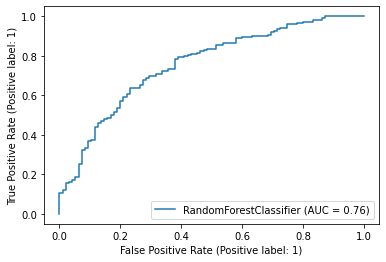

In [ ]:
# roc curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf_clf1, X_test, y_test)

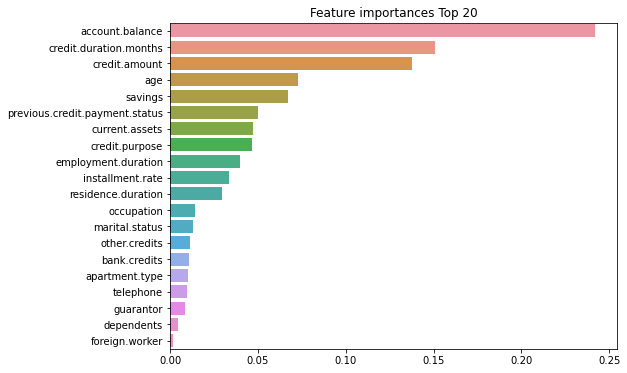

In [ ]:
# FeatureImportance 도출

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

# 다지분류

In [ ]:
import seaborn as sns
from sklearn.datasets import load_iris 
iris=load_iris()
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# train, test split (Test 30%)
train_x, test_x, train_y, test_y = train_test_split(iris_df.loc[:,:'petal_width'], iris_df['species'], test_size=0.3, random_state=42)

In [ ]:
# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가 > 과적합
rf_clf2 = RandomForestClassifier(random_state=0)
rf_clf2.fit(train_x , train_y)
preds = rf_clf2.predict(test_x)
accuracy = accuracy_score(test_y , preds)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 1.0000


In [ ]:
# 최적 Hyperparameter 도출: GridSearchCV 이용
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100,300],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf2 = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf2 , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(train_x, train_y)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

# n_estimators = 결증트리의 개수 (증가-성능 좋아짐, 시간소요 증가), default=10
# min_samples_split = 최소한의 샘플데이터 수 (적을수록 과적합, default =2)
# min_samples_leaf= 리프노드가 되기위한 최소한의 샘플데이터 수 (작게 설정 필요)
# max_depth = 트리의 최대 깊이 (깊어지면 과적합)

최적 하이퍼 파라미터:
 {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9146


In [ ]:
# 도출된 최적 Hyperparameter 값 재 적용
rf_clf3 = RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf3.fit(train_x , train_y)
pred = rf_clf3.predict(test_x)
print('예측 정확도: {0:.4f}'.format(accuracy_score(test_y, preds)))

예측 정확도: 1.0000


In [ ]:
# classficiation report
from sklearn.metrics import classification_report
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
# roc curve (? 안그려짐)
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf_clf3, test_x, test_y)

ValueError: RandomForestClassifier should be a binary classifier

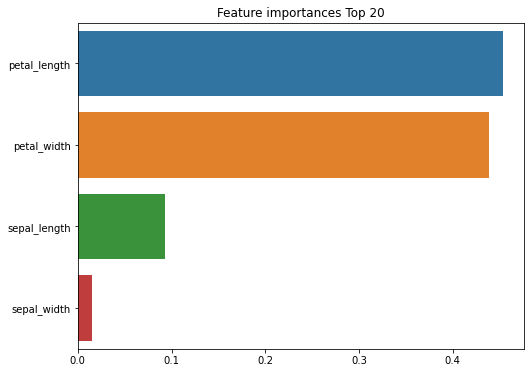

In [ ]:
# FeatureImportance 도출

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf3.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=train_x.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

Bagging

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
X_train, y_train= make_classification(n_samples=100, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = BaggingClassifier(base_estimator=SVC(),
                       n_estimators=10, random_state=0).fit(X_train, y_train)
clf.predict([[0, 0, 0, 0]])
array([1])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [ ]:
# model training, accuracy 
model = BaggingClassifier()
model.fit(X_train, y_train)
print('The accuracy for model = BaggingClassifier is:', model.score(X_test, y_test))

The accuracy for model = BaggingClassifier is: 0.73


In [ ]:
# prediction
preds=model.predict(X_test)

In [ ]:
# classfication
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57        95
           1       0.80      0.80      0.80       205

    accuracy                           0.73       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.73      0.73      0.73       300



Boosting
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

>>> from sklearn.ensemble import AdaBoostClassifier
>>> from sklearn.datasets import make_classification
>>> X, y = make_classification(n_samples=1000, n_features=4,
...                            n_informative=2, n_redundant=0,
...                            random_state=0, shuffle=False)
>>> clf = AdaBoostClassifier(n_estimators=100, random_state=0)
>>> clf.fit(X, y)
AdaBoostClassifier(n_estimators=100, random_state=0)
>>> clf.predict([[0, 0, 0, 0]])
array([1])
>>> clf.score(X, y)
0.983...

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# model training, accuracy 
model = AdaBoostClassifier()
model.fit(X_train, y_train)
print('The accuracy for model = AdaBoostClassifier is:', model.score(X_test, y_test))

The accuracy for model = AdaBoostClassifier is: 0.71


In [ ]:
# prediction
preds=model.predict(X_test)

In [ ]:
# classfication
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.56      0.42      0.48        95
           1       0.76      0.84      0.80       205

    accuracy                           0.71       300
   macro avg       0.66      0.63      0.64       300
weighted avg       0.69      0.71      0.70       300

